In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(seed=2017)

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [3]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


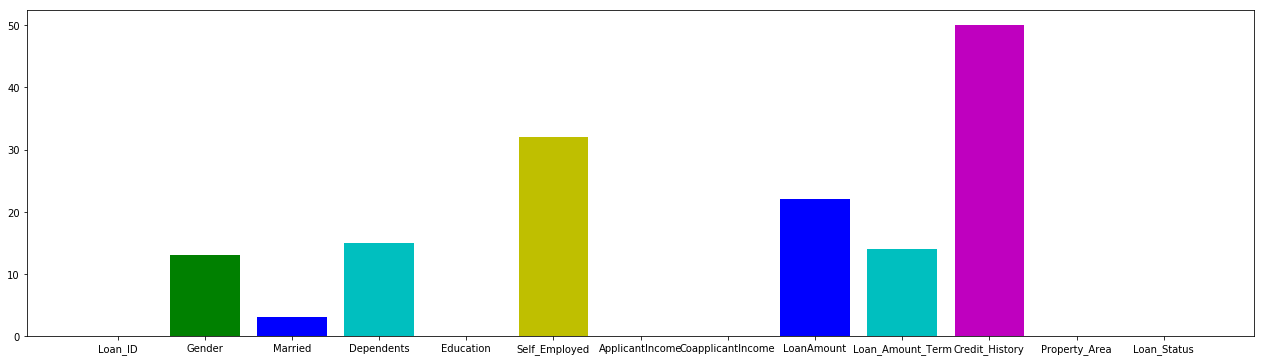

In [4]:
values=list(dataset.apply(lambda x:sum(x.isnull()),axis=0))
colors=['r', 'g', 'b', 'c', 'm','y','r', 'g', 'b', 'c', 'm','y','r']
fig= plt.figure(figsize=(22,6))
plt.bar(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
                         'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area',
                        'Loan_Status'], values, color= colors)
fig.show()

In [5]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [6]:
dataset=d
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset['Loan_Amount_Term'].fillna(np.median(dataset.Loan_Amount_Term),inplace=True)
dataset['Credit_History'].fillna(np.median(dataset.Credit_History),inplace=True)
dataset['Dependents'].fillna(np.median(dataset.Dependents),inplace=True)
dataset.dropna(how='any',inplace=True)

C:\Users\Pritam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [7]:
dataset.to_csv('loan-prediction1.csv',index=False)
dataset.shape

(499, 13)

In [8]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
print(X.shape,y.shape)

(499, 11) (499,)


In [9]:
#Multi variate regression for analysis
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_=scale.fit_transform(X)
est=sm.OLS(y,X_).fit()
est.summary()

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.636
Date:                Sat, 29 Jun 2019   Prob (F-statistic):           9.65e-07
Time:                        12:39:25   Log-Likelihood:                -588.26
No. Observations:                 499   AIC:                             1199.
Df Residuals:                     488   BIC:                             1245.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0113      0.039      0.291      0.771      -0.065       0.087
x2             0.0443      0.041      1.081      0.280      -0.036       0.125
x3             0.0083      0.039      0.212      0.832      -0.069       0.085
x4             0.0329      0.037      0.895      0.371      -0.039       0.105
x5            -0.0030      0.036     -0.083      0.934      -0.074       0.068
x6            -0.0012      0.043     -0.028      0.978      -0.085       0.083
x7            -0.0213      0.038     -0.562      0.574      -0.096       0.053
x8            -0.0338      0.044     -0.771      0.441      -0.120       0.052
x9             0.0004      0.036      0.012      0.991      -0.071       0.072
x10            0.2409      0.036      6.722      0.000       0.171       0.311
x11            0.0024      0.036      0.067      0.947      -0.068       0.073
==============================================================================
Omnibus:                       71.150   Durbin-Watson:                   0.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.307
Skew:                          -1.080   Prob(JB):                     2.73e-22
Kurtosis:                       3.338   Cond. No.                         2.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#feature selection
#https://scikit-learn.org/stable/modules/feature_selection.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=5)
rfe = RFE(dt, 8)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[False False  True False  True  True  True  True  True  True  True]
[4 3 1 2 1 1 1 1 1 1 1]


In [11]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2


In [12]:
X_new=rfe.fit_transform(X,y)

In [13]:
import pandas as pd
X_df=pd.DataFrame(X_new)
X_df.head()
X_df.to_csv('featured_X_dataframe.csv',index=False)
X_df=pd.read_csv('featured_X_dataframe.csv')
X=X_df
X.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0
1,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0
2,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0
3,0.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0
4,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2017)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
#learning curve plotter
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [17]:
#cross validation and accuracy measures
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Test set score svm_cls: 0.766667
Classification report for on test:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        46
           1       0.81      0.88      0.84       104

   micro avg       0.77      0.77      0.77       150
   macro avg       0.73      0.70      0.71       150
weighted avg       0.76      0.77      0.76       150


Confusion matrix for svm_cls_rbf on test:
[[24 22]
 [13 91]]
5 fold cross validation
[0.8019802  0.69       0.81       0.80808081 0.74747475] 0.7715071507150715


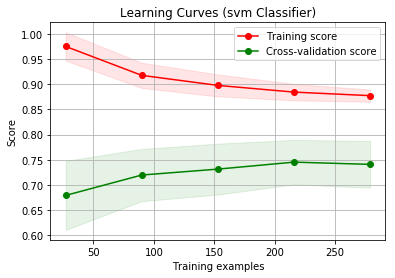

In [18]:
#support vector machine
#https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm 
svm_cls = svm.SVC(gamma=0.05,C=100,kernel='rbf')
svm_cls.fit(X_train_std, y_train)

print("Test set score svm_cls: %f" % svm_cls.score(X_test_std, y_test))
print("Classification report for on test:\n%s\n"% (classification_report(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for svm_cls_rbf on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(svm_cls, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(svm_cls,"Learning Curves (svm Classifier)" , X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score dt: 0.760000
Classification report for dt on test:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63        46
           1       0.85      0.80      0.82       104

   micro avg       0.76      0.76      0.76       150
   macro avg       0.72      0.74      0.73       150
weighted avg       0.77      0.76      0.76       150


Confusion matrix for dt on test:
[[31 15]
 [21 83]]
5 fold cross validation
[0.71287129 0.64       0.71       0.72727273 0.78787879] 0.7156045604560456


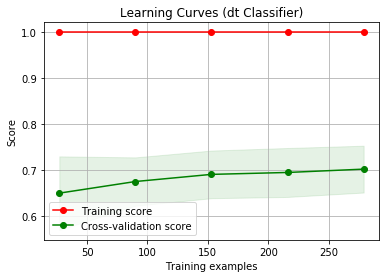

In [19]:
#dt
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',random_state=5)
dt.fit(X_train_std, y_train)

print("Test set score dt: %f" % dt.score(X_test_std, y_test))
print("Classification report for dt on test:\n%s\n"% (classification_report(y_test, dt.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(dt , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(dt,"Learning Curves (dt Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


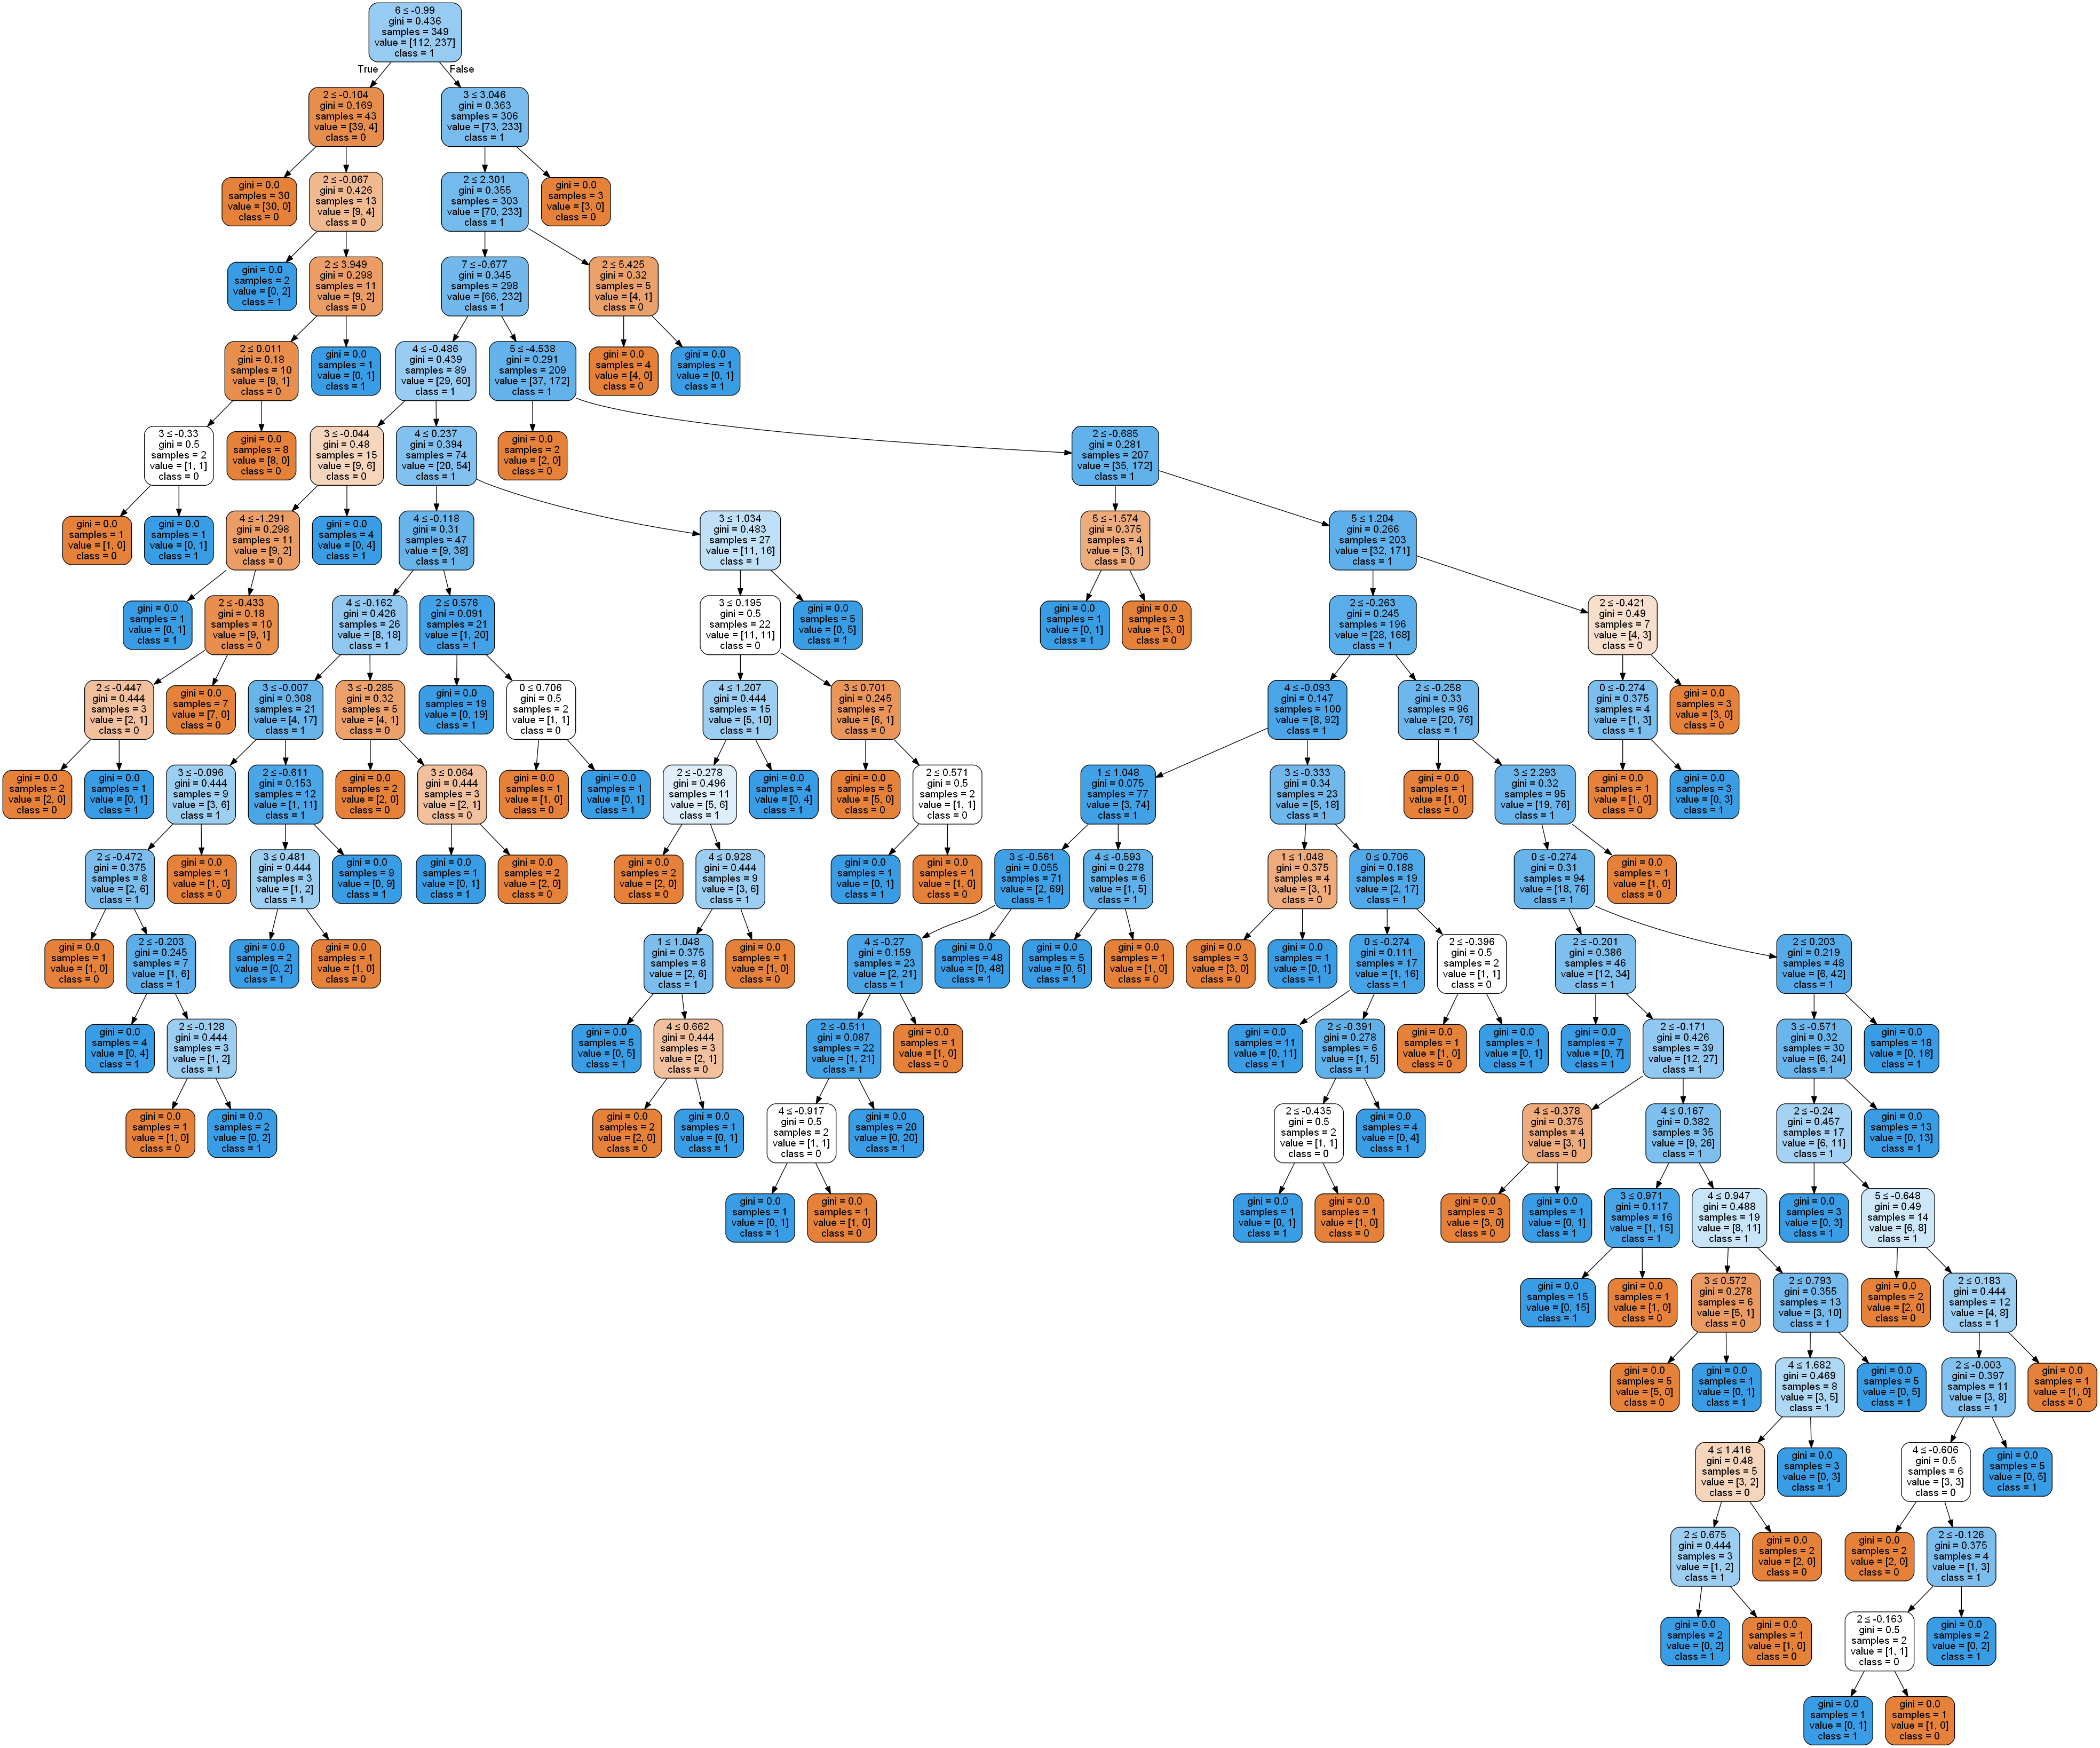

In [20]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image  

import os
import sys

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
        
        
from sklearn import tree

buffer = StringIO()
tree.export_graphviz(dt, out_file=buffer, 
                         feature_names=X.columns,  
                         class_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(buffer.getvalue())
conda_fix(graph)
graph.write_pdf("loan_tree.pdf") 
Image(graph.create_png())

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Test set score ada: 0.753333
Classification report for ada on test:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        46
           1       0.84      0.80      0.82       104

   micro avg       0.75      0.75      0.75       150
   macro avg       0.71      0.73      0.72       150
weighted avg       0.76      0.75      0.76       150


Confusion matrix for ada on test:
[[30 16]
 [21 83]]
5 fold cross validation
[0.71287129 0.65       0.68       0.70707071 0.78787879] 0.7075641564156416


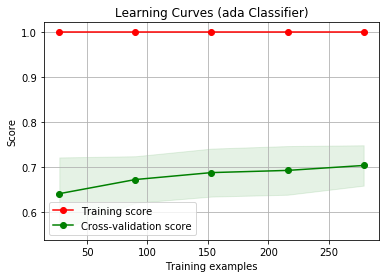

In [21]:
#ada-booster #boosting
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,learning_rate=0.01, random_state=0)
ada.fit(X_train_std, y_train)

print("Test set score ada: %f" % ada.score(X_test_std, y_test))
print("Classification report for ada on test:\n%s\n"% (classification_report(y_test, ada.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(ada , X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(ada,"Learning Curves (ada Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

Test set score rf: 0.820000
Classification report for rf on test:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        46
           1       0.85      0.89      0.87       104

   micro avg       0.82      0.82      0.82       150
   macro avg       0.79      0.77      0.78       150
weighted avg       0.82      0.82      0.82       150


Confusion matrix for rf on test:
[[30 16]
 [11 93]]
5 fold cross validation
[0.8019802  0.74       0.78       0.78787879 0.75757576] 0.7734869486948697


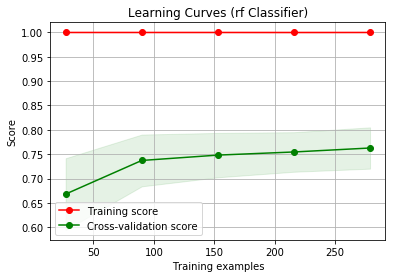

In [22]:
#random forest #baggibg
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=5,max_features='auto')
rf.fit(X_train_std, y_train)

print("Test set score rf: %f" % rf.score(X_test_std, y_test))
print("Classification report for rf on test:\n%s\n"% (classification_report(y_test, rf.predict(X_test_std))))
print("Confusion matrix for rf on test:\n%s" % (confusion_matrix(y_test, rf.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(rf, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(rf,"Learning Curves (rf Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test set score mlp: 0.840000
Classification report for mlp on test:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        46
           1       0.86      0.92      0.89       104

   micro avg       0.84      0.84      0.84       150
   macro avg       0.82      0.79      0.80       150
weighted avg       0.84      0.84      0.84       150


Confusion matrix for mlp on test:
[[30 16]
 [ 8 96]]
5 fold cross validation


C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

[0.82178218 0.71       0.78       0.81818182 0.7979798 ] 0.7855887588758876


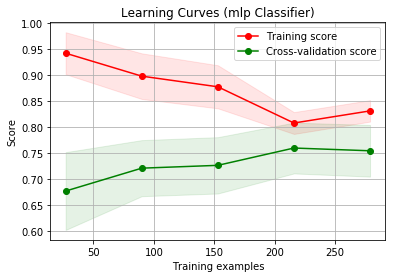

In [23]:
#perceptron #feed forward
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,2), activation='logistic',max_iter=500,learning_rate_init=0.005,tol=1e-41,solver='adam')
mlp.fit(X_train_std, y_train)

print("Test set score mlp: %f" % mlp.score(X_test_std, y_test))
print("Classification report for mlp on test:\n%s\n"% (classification_report(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(mlp, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(mlp,"Learning Curves (mlp Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score knn: 0.733333
Classification report for knn on test:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        46
           1       0.79      0.84      0.81       104

   micro avg       0.73      0.73      0.73       150
   macro avg       0.68      0.67      0.67       150
weighted avg       0.72      0.73      0.73       150


Confusion matrix for knn on test:
[[23 23]
 [17 87]]
5 fold cross validation
[0.79207921 0.69       0.8        0.71717172 0.77777778] 0.7554057405740574


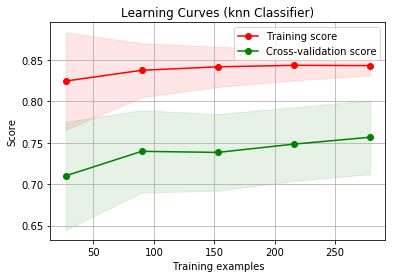

In [24]:
#KNN 5
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=3)
knn.fit(X_train_std, y_train)

print("Test set score knn: %f" % knn.score(X_test_std, y_test))
print("Classification report for knn on test:\n%s\n"% (classification_report(y_test, knn.predict(X_test_std))))
print("Confusion matrix for knn on test:\n%s" % (confusion_matrix(y_test, knn.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(knn, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(knn,"Learning Curves (knn Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


Test set score lr: 0.860000
Classification report for lr on test:
              precision    recall  f1-score   support

           0       0.90      0.61      0.73        46
           1       0.85      0.97      0.91       104

   micro avg       0.86      0.86      0.86       150
   macro avg       0.88      0.79      0.82       150
weighted avg       0.87      0.86      0.85       150


Confusion matrix for lr on test:
[[ 28  18]
 [  3 101]]
5 fold cross validation
[0.81188119 0.76       0.77       0.85858586 0.7979798 ] 0.7996893689368937


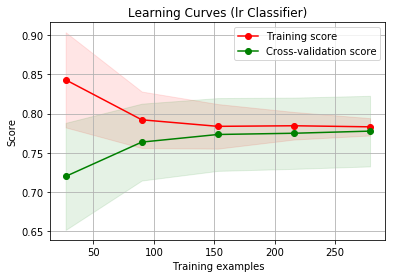

In [25]:
#logistic regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression as LR
lr=LR(C=1.0,solver='newton-cg',penalty='l2',multi_class='ovr',max_iter=500)
lr.fit(X_train_std, y_train)

print("Test set score lr: %f" % lr.score(X_test_std, y_test))
print("Classification report for lr on test:\n%s\n"% (classification_report(y_test, lr.predict(X_test_std))))
print("Confusion matrix for lr on test:\n%s" % (confusion_matrix(y_test, lr.predict(X_test_std))))
print('5 fold cross validation')
cvs=cross_val_score(lr, X_std, y, cv=5)
print(cvs,np.mean(cvs))

plot_learning_curve(lr,"Learning Curves (lr Classifier)", X_train_std,y_train,ylim=None,n_jobs=4)
plt.show()


In [26]:
#saving models
from sklearn.externals import joblib #dumping and loading model
joblib.dump(svm_cls,'svm_cls_model.joblib')
joblib.dump(dt,'dt_model.joblib')
joblib.dump(ada,'ada_model.joblib')
joblib.dump(mlp,'mlp_model.joblib')
joblib.dump(knn,'knn_model.joblib')
joblib.dump(lr,'lr_model.joblib')
joblib.dump(rf,'rf_model.joblib')

['rf_model.joblib']

C:\Users\Pritam\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\Pritam\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


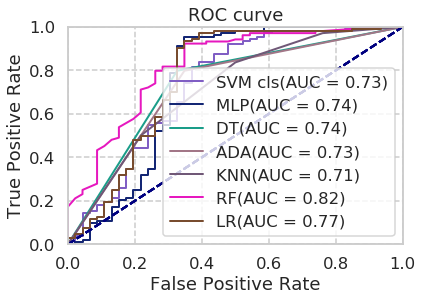

In [27]:
import seaborn as sns
from sklearn import metrics
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

svm_cls_pred=svm_cls.predict(X_test_std)
mlp_pred=mlp.predict(X_test_std)
dt_pred=dt.predict(X_test_std)
ada_pred=ada.predict(X_test_std)
knn_pred=knn.predict(X_test_std)
rf_pred=rf.predict(X_test_std)
lr_pred=lr.predict(X_test_std)


svm_cls_pred_proba=svm_cls.decision_function(X_test_std)
mlp_pred_proba=mlp.predict_proba(X_test_std)[:,1]
dt_pred_proba=dt.predict_proba(X_test_std)[:,1]
ada_pred_proba=ada.predict_proba(X_test_std)[:,1]
knn_pred_proba=knn.predict_proba(X_test_std)[:,1]
rf_pred_proba=rf.predict_proba(X_test_std)[:,1]
lr_pred_proba=lr.predict_proba(X_test_std)[:,1]


plotAUC(y_test,svm_cls_pred_proba,'SVM cls')
plotAUC(y_test,mlp_pred_proba,'MLP')
plotAUC(y_test,dt_pred_proba,'DT')
plotAUC(y_test,ada_pred_proba,'ADA')
plotAUC(y_test,knn_pred_proba,'KNN')
plotAUC(y_test,rf_pred_proba,'RF')
plotAUC(y_test,lr_pred_proba,'LR')
plt.show()

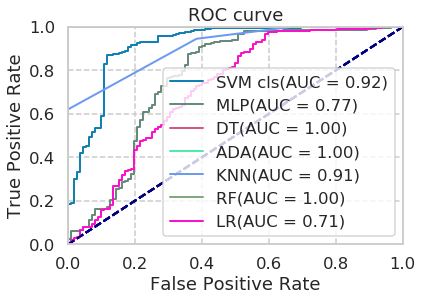

In [28]:
svm_cls_pred=svm_cls.predict(X_train_std)
mlp_pred=mlp.predict(X_train_std)
dt_pred=dt.predict(X_train_std)
ada_pred=ada.predict(X_train_std)
knn_pred=knn.predict(X_train_std)
rf_pred=rf.predict(X_train_std)
lr_pred=lr.predict(X_train_std)


svm_cls_pred_proba=svm_cls.decision_function(X_train_std)
mlp_pred_proba=mlp.predict_proba(X_train_std)[:,1]
dt_pred_proba=dt.predict_proba(X_train_std)[:,1]
ada_pred_proba=ada.predict_proba(X_train_std)[:,1]
knn_pred_proba=knn.predict_proba(X_train_std)[:,1]
rf_pred_proba=rf.predict_proba(X_train_std)[:,1]
lr_pred_proba=lr.predict_proba(X_train_std)[:,1]


plotAUC(y_train,svm_cls_pred_proba,'SVM cls')
plotAUC(y_train,mlp_pred_proba,'MLP')
plotAUC(y_train,dt_pred_proba,'DT')
plotAUC(y_train,ada_pred_proba,'ADA')
plotAUC(y_train,knn_pred_proba,'KNN')
plotAUC(y_train,rf_pred_proba,'RF')
plotAUC(y_train,lr_pred_proba,'LR')
plt.show()

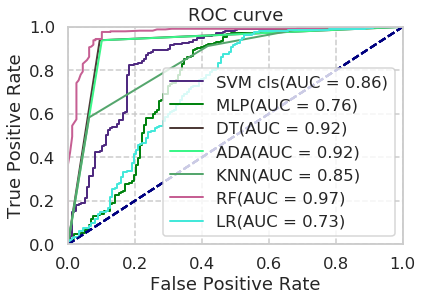

In [29]:
svm_cls_pred=svm_cls.predict(X_std)
mlp_pred=mlp.predict(X_std)
dt_pred=dt.predict(X_std)
ada_pred=ada.predict(X_std)
knn_pred=knn.predict(X_std)
rf_pred=rf.predict(X_std)
lr_pred=lr.predict(X_std)


svm_cls_pred_proba=svm_cls.decision_function(X_std)
mlp_pred_proba=mlp.predict_proba(X_std)[:,1]
dt_pred_proba=dt.predict_proba(X_std)[:,1]
ada_pred_proba=ada.predict_proba(X_std)[:,1]
knn_pred_proba=knn.predict_proba(X_std)[:,1]
rf_pred_proba=rf.predict_proba(X_std)[:,1]
lr_pred_proba=lr.predict_proba(X_std)[:,1]


plotAUC(y,svm_cls_pred_proba,'SVM cls')
plotAUC(y,mlp_pred_proba,'MLP')
plotAUC(y,dt_pred_proba,'DT')
plotAUC(y,ada_pred_proba,'ADA')
plotAUC(y,knn_pred_proba,'KNN')
plotAUC(y,rf_pred_proba,'RF')
plotAUC(y,lr_pred_proba,'LR')
plt.show()

In [30]:
print("Confusion matrix for svm_cls on test:\n%s" % (confusion_matrix(y_test, svm_cls.predict(X_test_std))))
print("Confusion matrix for dt on test:\n%s" % (confusion_matrix(y_test, dt.predict(X_test_std))))
print("Confusion matrix for ada on test:\n%s" % (confusion_matrix(y_test, ada.predict(X_test_std))))
print("Confusion matrix for mlp on test:\n%s" % (confusion_matrix(y_test, mlp.predict(X_test_std))))
print("Confusion matrix for rf on test:\n%s" % (confusion_matrix(y_test, rf.predict(X_test_std))))
print("Confusion matrix for knn on test:\n%s" % (confusion_matrix(y_test, knn.predict(X_test_std))))
print("Confusion matrix for lr on test:\n%s" % (confusion_matrix(y_test, lr.predict(X_test_std))))

Confusion matrix for svm_cls on test:
[[24 22]
 [13 91]]
Confusion matrix for dt on test:
[[31 15]
 [21 83]]
Confusion matrix for ada on test:
[[30 16]
 [21 83]]
Confusion matrix for mlp on test:
[[30 16]
 [ 8 96]]
Confusion matrix for rf on test:
[[30 16]
 [11 93]]
Confusion matrix for knn on test:
[[23 23]
 [17 87]]
Confusion matrix for lr on test:
[[ 28  18]
 [  3 101]]


In [31]:
print("Confusion matrix for svm_cls on train:\n%s" % (confusion_matrix(y_train, svm_cls.predict(X_train_std))))
print("Confusion matrix for dt on train:\n%s" % (confusion_matrix(y_train, dt.predict(X_train_std))))
print("Confusion matrix for ada on train:\n%s" % (confusion_matrix(y_train, ada.predict(X_train_std))))
print("Confusion matrix for mlp on train:\n%s" % (confusion_matrix(y_train, mlp.predict(X_train_std))))
print("Confusion matrix for rf on train:\n%s" % (confusion_matrix(y_train, rf.predict(X_train_std))))
print("Confusion matrix for knn on train:\n%s" % (confusion_matrix(y_train, knn.predict(X_train_std))))
print("Confusion matrix for lr on train:\n%s" % (confusion_matrix(y_train, lr.predict(X_train_std))))

Confusion matrix for svm_cls on train:
[[ 70  42]
 [  4 233]]
Confusion matrix for dt on train:
[[112   0]
 [  0 237]]
Confusion matrix for ada on train:
[[112   0]
 [  0 237]]
Confusion matrix for mlp on train:
[[ 55  57]
 [  8 229]]
Confusion matrix for rf on train:
[[112   0]
 [  0 237]]
Confusion matrix for knn on train:
[[ 69  43]
 [ 13 224]]
Confusion matrix for lr on train:
[[ 40  72]
 [  4 233]]


In [32]:
print("Confusion matrix for svm_cls on total:\n%s" % (confusion_matrix(y, svm_cls.predict(X_std))))
print("Confusion matrix for dt on total:\n%s" % (confusion_matrix(y, dt.predict(X_std))))
print("Confusion matrix for ada on total:\n%s" % (confusion_matrix(y, ada.predict(X_std))))
print("Confusion matrix for mlp on total:\n%s" % (confusion_matrix(y, mlp.predict(X_std))))
print("Confusion matrix for rf on total:\n%s" % (confusion_matrix(y, rf.predict(X_std))))
print("Confusion matrix for knn on total:\n%s" % (confusion_matrix(y, knn.predict(X_std))))
print("Confusion matrix for lr on total:\n%s" % (confusion_matrix(y, lr.predict(X_std))))

Confusion matrix for svm_cls on total:
[[ 94  64]
 [ 17 324]]
Confusion matrix for dt on total:
[[143  15]
 [ 21 320]]
Confusion matrix for ada on total:
[[142  16]
 [ 21 320]]
Confusion matrix for mlp on total:
[[ 85  73]
 [ 16 325]]
Confusion matrix for rf on total:
[[142  16]
 [ 11 330]]
Confusion matrix for knn on total:
[[ 92  66]
 [ 30 311]]
Confusion matrix for lr on total:
[[ 68  90]
 [  7 334]]


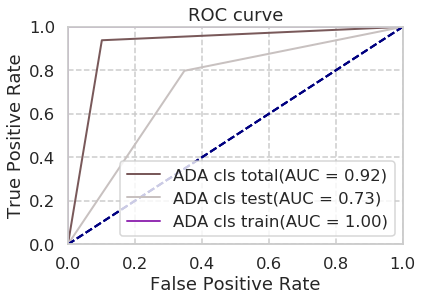

In [33]:
svm_cls_pred_proba_test=ada.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=ada.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=ada.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'ADA cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'ADA cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'ADA cls train')
plt.show()

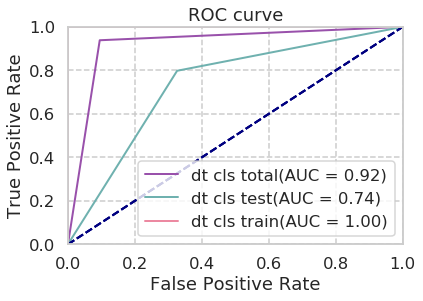

In [34]:


svm_cls_pred_proba_test=dt.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=dt.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=dt.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'dt cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'dt cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'dt cls train')
plt.show()

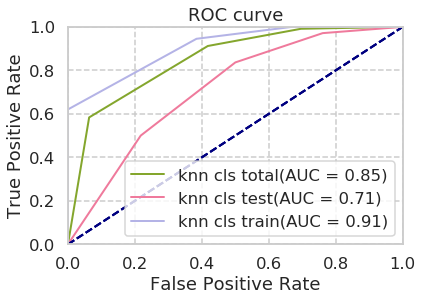

In [35]:
svm_cls_pred_proba_test=knn.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=knn.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=knn.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'knn cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'knn cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'knn cls train')
plt.show()

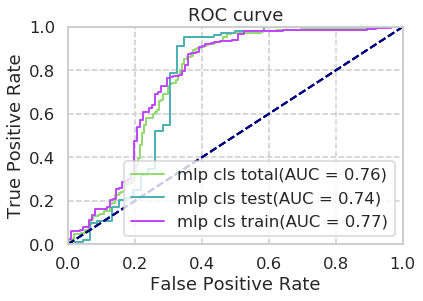

In [36]:
svm_cls_pred_proba_test=mlp.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=mlp.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=mlp.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'mlp cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'mlp cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'mlp cls train')
plt.show()

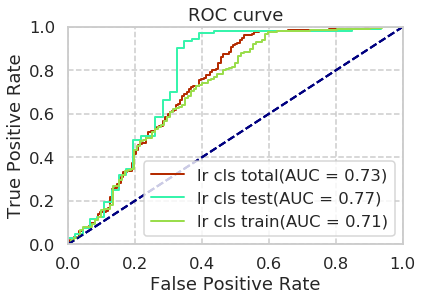

In [37]:
svm_cls_pred_proba_test=lr.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=lr.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=lr.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'lr cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'lr cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'lr cls train')
plt.show()

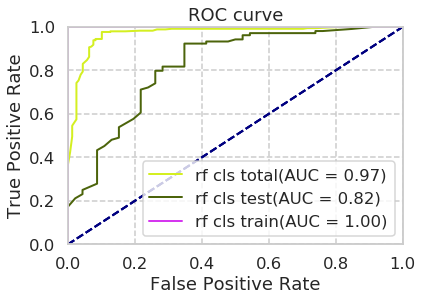

In [38]:
svm_cls_pred_proba_test=rf.predict_proba(X_test_std)[:,1]
svm_cls_pred_proba_train=rf.predict_proba(X_train_std)[:,1]
svm_cls_pred_proba=rf.predict_proba(X_std)[:,1]

plotAUC(y,svm_cls_pred_proba,'rf cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'rf cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'rf cls train')
plt.show()

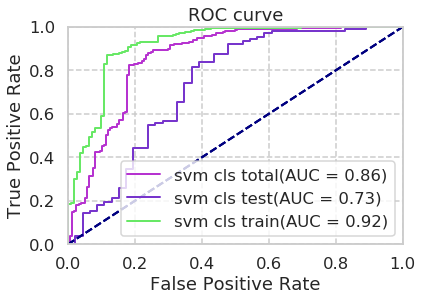

In [39]:
svm_cls_pred_proba_test=svm_cls.decision_function(X_test_std)
svm_cls_pred_proba_train=svm_cls.decision_function(X_train_std)
svm_cls_pred_proba=svm_cls.decision_function(X_std)

plotAUC(y,svm_cls_pred_proba,'svm cls total')
plotAUC(y_test,svm_cls_pred_proba_test,'svm cls test')
plotAUC(y_train,svm_cls_pred_proba_train,'svm cls train')
plt.show()